# Explore data set and sequence lengths

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [2]:
%%time
enfile = 'data/train/europarl-v7.fr-en.en'
frfile = 'data/train/europarl-v7.fr-en.fr'

with open(enfile, 'r') as f:
    enlines = f.read().split('\n')
with open(frfile, 'r') as f:
    frlines = f.read().split('\n')
lines = zip(enlines, frlines)
lengths = np.array([[len(en), len(fr)] for en, fr in lines])

CPU times: user 7.1 s, sys: 1.01 s, total: 8.11 s
Wall time: 10.5 s


We can see from the following plot that the line lengths in europarl looks exponentially distributed. We can cut off the longest samples without loosing much:

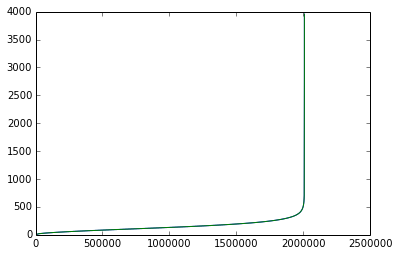

In [10]:
# French and english lengths plotted together. It's hard to see a difference
rng = xrange(len(lengths))
plt.plot(rng, sorted(lengths[:,0]), rng, sorted(lengths[:,0]))

Lets see the proportion of samples that are left if we remove samples where the english sentences that are longer than `upper_cutoff` or shorter than `lower_cutoff`:

In [11]:
upper_cutoff = 400
lower_cutoff = 2
len([x for x in lengths[:,0] if x < upper_cutoff and x > lower_cutoff])/float(len(lengths[:,0]))

0.9803643329461619

Likewise for *french

In [16]:
upper_cutoff = 450
lower_cutoff = 2
len([x for x in lengths[:,1] if x < upper_cutoff and x > lower_cutoff])/float(len(lengths[:,1]))

0.9784063945044239

It seems like french sentences are likely to be slightly longer

# For generating the alphabet to use

This script will generate text files with one line per unique character that is fount in the data. This should ensure that the characters have the same id every time we build a model.

In [71]:
from collections import Counter
import numpy as np

In [95]:
def generate_alphabet(filenames, alphabet_file):
    """Make a list of all characters that appear at least once in a file in the filenames list.
    Save the list as alphabet_file with one character per line."""
    contents = ''
    for filename in filenames:
        with open(filename, 'r') as f:
            contents += f.read()
    
    alphacount = Counter(contents)
    
    with open(alphabet_file, 'w') as f:
        f.write('\n'.join(alphacount.keys()))

In [96]:
generate_alphabet(['data/train/europarl-v7.fr-en.en', 'data/train/giga-fren.release2.en'], 'alphabet.en')

In [97]:
generate_alphabet(['data/train/europarl-v7.fr-en.fr', 'data/train/giga-fren.release2.fr'], 'alphabet.fr')